# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [31]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [32]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

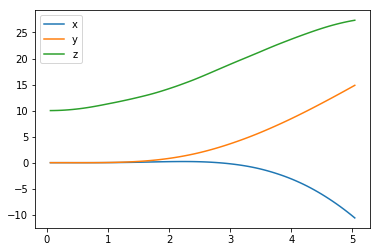

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

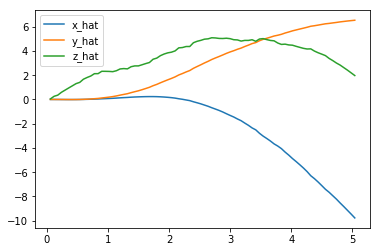

In [34]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

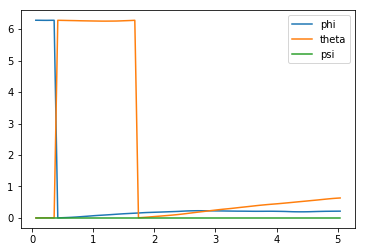

In [35]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

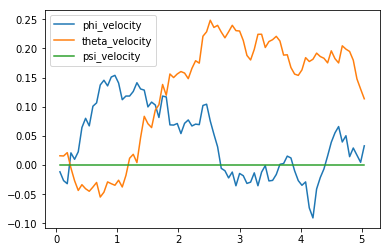

In [36]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

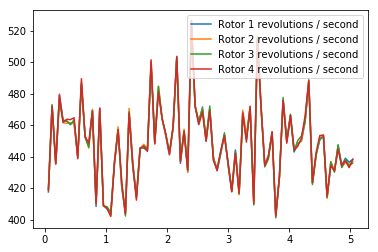

In [37]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [38]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-10.60964168  14.85139164  27.34939253   0.21484778   0.63388099   0.        ]
[-9.77354501  6.53507628  1.97263605]
[ 0.03297332  0.11361787  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [39]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.328 (best =  -0.076), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [46]:
## TODO: Train your agent here.

import sys
import pandas as pd
import csv
import numpy as np
from agents.agent import DDPG
from task import Task

file_output = 'rewards.txt'
num_episodes = 512
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task)
done = False

labels = ['hover_episode', 'hover_total_reward']
results = {x : [] for x in labels}

with open(file_output, 'w') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(labels)  
    best_total_reward = 0
    # For each episode and till it is done
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode()
        total_reward = 0
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            total_reward += reward
            if total_reward > best_total_reward:
                best_total_reward = total_reward
            agent.step(action, reward, next_state, done)
            state = next_state
            if done:
                to_write = [i_episode] + [total_reward]
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                csv_writer.writerow(to_write)
                print("\n(Hover) Episode number {:4d} has total rewards: {:7.3f} (best so far = {:7.3f}) \n".format(
                    i_episode, total_reward, best_total_reward), end="")
                break
        sys.stdout.flush()


(Hover) Episode number    1 has total rewards: -81.637 (best so far =  39.702) 

(Hover) Episode number    2 has total rewards: -81.842 (best so far =  39.702) 

(Hover) Episode number    3 has total rewards: -81.911 (best so far =  39.702) 

(Hover) Episode number    4 has total rewards: -81.517 (best so far =  39.702) 

(Hover) Episode number    5 has total rewards: -108.874 (best so far =  40.161) 

(Hover) Episode number    6 has total rewards: -59.410 (best so far =  48.064) 

(Hover) Episode number    7 has total rewards: -61.693 (best so far =  58.854) 

(Hover) Episode number    8 has total rewards: -24.254 (best so far =  58.854) 

(Hover) Episode number    9 has total rewards: -42.621 (best so far =  58.854) 

(Hover) Episode number   10 has total rewards: -60.694 (best so far =  58.854) 

(Hover) Episode number   11 has total rewards: -66.646 (best so far =  58.854) 

(Hover) Episode number   12 has total rewards: -134.032 (best so far =  58.854) 

(Hover) Episode number   


(Hover) Episode number  103 has total rewards: -21.568 (best so far =  58.854) 

(Hover) Episode number  104 has total rewards: -22.700 (best so far =  58.854) 

(Hover) Episode number  105 has total rewards: -15.491 (best so far =  58.854) 

(Hover) Episode number  106 has total rewards: -65.325 (best so far =  58.854) 

(Hover) Episode number  107 has total rewards: -52.229 (best so far =  58.854) 

(Hover) Episode number  108 has total rewards: -59.627 (best so far =  58.854) 

(Hover) Episode number  109 has total rewards: -21.323 (best so far =  58.854) 

(Hover) Episode number  110 has total rewards:  -8.275 (best so far =  58.854) 

(Hover) Episode number  111 has total rewards: -12.163 (best so far =  58.854) 

(Hover) Episode number  112 has total rewards:   3.105 (best so far =  58.854) 

(Hover) Episode number  113 has total rewards:  -2.054 (best so far =  58.854) 

(Hover) Episode number  114 has total rewards: -34.664 (best so far =  58.854) 

(Hover) Episode number  115


(Hover) Episode number  204 has total rewards: -22.137 (best so far =  58.854) 

(Hover) Episode number  205 has total rewards: -22.536 (best so far =  58.854) 

(Hover) Episode number  206 has total rewards: -21.837 (best so far =  58.854) 

(Hover) Episode number  207 has total rewards: -21.698 (best so far =  58.854) 

(Hover) Episode number  208 has total rewards: -21.923 (best so far =  58.854) 

(Hover) Episode number  209 has total rewards: -22.121 (best so far =  58.854) 

(Hover) Episode number  210 has total rewards: -21.711 (best so far =  58.854) 

(Hover) Episode number  211 has total rewards: -21.958 (best so far =  58.854) 

(Hover) Episode number  212 has total rewards: -22.115 (best so far =  58.854) 

(Hover) Episode number  213 has total rewards: -22.607 (best so far =  58.854) 

(Hover) Episode number  214 has total rewards: -22.244 (best so far =  58.854) 

(Hover) Episode number  215 has total rewards: -22.747 (best so far =  58.854) 

(Hover) Episode number  216


(Hover) Episode number  306 has total rewards:  -8.265 (best so far =  58.854) 

(Hover) Episode number  307 has total rewards:  -8.608 (best so far =  58.854) 

(Hover) Episode number  308 has total rewards:  -8.624 (best so far =  58.854) 

(Hover) Episode number  309 has total rewards:  -8.592 (best so far =  58.854) 

(Hover) Episode number  310 has total rewards:  -8.564 (best so far =  58.854) 

(Hover) Episode number  311 has total rewards:  -8.532 (best so far =  58.854) 

(Hover) Episode number  312 has total rewards:  -8.573 (best so far =  58.854) 

(Hover) Episode number  313 has total rewards:  -8.665 (best so far =  58.854) 

(Hover) Episode number  314 has total rewards:  -8.614 (best so far =  58.854) 

(Hover) Episode number  315 has total rewards:  -8.581 (best so far =  58.854) 

(Hover) Episode number  316 has total rewards:  -8.668 (best so far =  58.854) 

(Hover) Episode number  317 has total rewards:  -8.777 (best so far =  58.854) 

(Hover) Episode number  318


(Hover) Episode number  408 has total rewards:  -8.467 (best so far =  58.854) 

(Hover) Episode number  409 has total rewards:  -8.551 (best so far =  58.854) 

(Hover) Episode number  410 has total rewards:  -8.723 (best so far =  58.854) 

(Hover) Episode number  411 has total rewards:  -8.740 (best so far =  58.854) 

(Hover) Episode number  412 has total rewards:  -8.686 (best so far =  58.854) 

(Hover) Episode number  413 has total rewards:  -8.635 (best so far =  58.854) 

(Hover) Episode number  414 has total rewards:  -8.621 (best so far =  58.854) 

(Hover) Episode number  415 has total rewards:  -8.577 (best so far =  58.854) 

(Hover) Episode number  416 has total rewards:  -8.515 (best so far =  58.854) 

(Hover) Episode number  417 has total rewards:  -8.502 (best so far =  58.854) 

(Hover) Episode number  418 has total rewards:  -8.727 (best so far =  58.854) 

(Hover) Episode number  419 has total rewards:  -8.488 (best so far =  58.854) 

(Hover) Episode number  420


(Hover) Episode number  510 has total rewards:  -8.529 (best so far =  58.854) 

(Hover) Episode number  511 has total rewards:  -8.629 (best so far =  58.854) 

(Hover) Episode number  512 has total rewards:  -8.572 (best so far =  58.854) 


In [47]:
import csv
import pandas as pd 
import sys
import numpy as np
from task import Task
from agents.agent import DDPG

file_output = 'rewards.txt'
episodes = 512
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 
labels = ['takeoff_episode', 'takeoff_total_reward']
results.update({x : [] for x in labels})
done = False

# Running the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(labels)
    best_total_reward = 0
    # For each episode and till it is done
    for i in range(1, episodes+1):
        state = agent.reset_episode()
        total_reward = 0
        while True:
            action = agent.act(state)
            next_state, reward, done = task.step(action)
            total_reward += reward
            if total_reward > best_total_reward:
                best_total_reward = total_reward
            agent.step(action, reward, next_state, done)
            state = next_state
            if done:
                to_write = [i] + [total_reward]
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                csv_writer.writerow(to_write)
                print("\n(Take off) Episode number {:4d} has total rewards: {:7.3f} (best so far = {:7.3f}) \n".format(
                    i, total_reward, best_total_reward), end="")
                break
        sys.stdout.flush()


(Take off) Episode number    1 has total rewards: -46.036 (best so far =  40.666) 

(Take off) Episode number    2 has total rewards: -46.153 (best so far =  40.666) 

(Take off) Episode number    3 has total rewards: -45.801 (best so far =  40.666) 

(Take off) Episode number    4 has total rewards: -46.279 (best so far =  40.666) 

(Take off) Episode number    5 has total rewards: -78.813 (best so far =  40.666) 

(Take off) Episode number    6 has total rewards: -85.964 (best so far =  40.666) 

(Take off) Episode number    7 has total rewards: -34.476 (best so far =  40.666) 

(Take off) Episode number    8 has total rewards: -63.874 (best so far =  40.666) 

(Take off) Episode number    9 has total rewards: -57.986 (best so far =  40.666) 

(Take off) Episode number   10 has total rewards: -10.567 (best so far =  43.402) 

(Take off) Episode number   11 has total rewards: -46.484 (best so far =  43.402) 

(Take off) Episode number   12 has total rewards: -30.572 (best so far =  4


(Take off) Episode number   99 has total rewards:  -8.646 (best so far =  43.402) 

(Take off) Episode number  100 has total rewards:  -8.613 (best so far =  43.402) 

(Take off) Episode number  101 has total rewards:  -8.853 (best so far =  43.402) 

(Take off) Episode number  102 has total rewards:  -9.359 (best so far =  43.402) 

(Take off) Episode number  103 has total rewards: -15.789 (best so far =  43.402) 

(Take off) Episode number  104 has total rewards: -16.320 (best so far =  43.402) 

(Take off) Episode number  105 has total rewards: -36.209 (best so far =  43.402) 

(Take off) Episode number  106 has total rewards: -64.519 (best so far =  43.402) 

(Take off) Episode number  107 has total rewards: -16.124 (best so far =  43.402) 

(Take off) Episode number  108 has total rewards: -62.681 (best so far =  43.402) 

(Take off) Episode number  109 has total rewards: -126.249 (best so far =  43.402) 

(Take off) Episode number  110 has total rewards: -325.194 (best so far = 


(Take off) Episode number  197 has total rewards:  -3.416 (best so far =  43.402) 

(Take off) Episode number  198 has total rewards:  -2.324 (best so far =  43.402) 

(Take off) Episode number  199 has total rewards:  -2.890 (best so far =  43.402) 

(Take off) Episode number  200 has total rewards:  -7.870 (best so far =  43.402) 

(Take off) Episode number  201 has total rewards:   2.610 (best so far =  43.402) 

(Take off) Episode number  202 has total rewards:   2.705 (best so far =  43.402) 

(Take off) Episode number  203 has total rewards:   2.709 (best so far =  43.402) 

(Take off) Episode number  204 has total rewards:   2.709 (best so far =  43.402) 

(Take off) Episode number  205 has total rewards:   2.709 (best so far =  43.402) 

(Take off) Episode number  206 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  207 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  208 has total rewards:   2.709 (best so far =  4


(Take off) Episode number  295 has total rewards:  -8.554 (best so far =  43.402) 

(Take off) Episode number  296 has total rewards:  -8.583 (best so far =  43.402) 

(Take off) Episode number  297 has total rewards:  -8.592 (best so far =  43.402) 

(Take off) Episode number  298 has total rewards:  -8.592 (best so far =  43.402) 

(Take off) Episode number  299 has total rewards:  -8.615 (best so far =  43.402) 

(Take off) Episode number  300 has total rewards:  -8.745 (best so far =  43.402) 

(Take off) Episode number  301 has total rewards:  -8.589 (best so far =  43.402) 

(Take off) Episode number  302 has total rewards:  -8.586 (best so far =  43.402) 

(Take off) Episode number  303 has total rewards:  -8.490 (best so far =  43.402) 

(Take off) Episode number  304 has total rewards:  -8.566 (best so far =  43.402) 

(Take off) Episode number  305 has total rewards:  -8.512 (best so far =  43.402) 

(Take off) Episode number  306 has total rewards:  -8.515 (best so far =  4


(Take off) Episode number  393 has total rewards:  -9.062 (best so far =  43.402) 

(Take off) Episode number  394 has total rewards:  -9.213 (best so far =  43.402) 

(Take off) Episode number  395 has total rewards:  -8.971 (best so far =  43.402) 

(Take off) Episode number  396 has total rewards:  -9.242 (best so far =  43.402) 

(Take off) Episode number  397 has total rewards:  -9.138 (best so far =  43.402) 

(Take off) Episode number  398 has total rewards:  -9.085 (best so far =  43.402) 

(Take off) Episode number  399 has total rewards:  -9.220 (best so far =  43.402) 

(Take off) Episode number  400 has total rewards:  -9.064 (best so far =  43.402) 

(Take off) Episode number  401 has total rewards:  -9.153 (best so far =  43.402) 

(Take off) Episode number  402 has total rewards:  -8.917 (best so far =  43.402) 

(Take off) Episode number  403 has total rewards:  -9.045 (best so far =  43.402) 

(Take off) Episode number  404 has total rewards:  -9.148 (best so far =  4


(Take off) Episode number  491 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  492 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  493 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  494 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  495 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  496 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  497 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  498 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  499 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  500 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  501 has total rewards:   2.708 (best so far =  43.402) 

(Take off) Episode number  502 has total rewards:   2.708 (best so far =  4

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

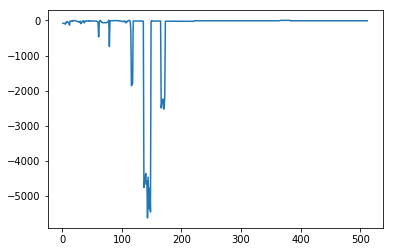

In [48]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(results['hover_episode'], results['hover_total_reward'])
_ = plt.ylim()

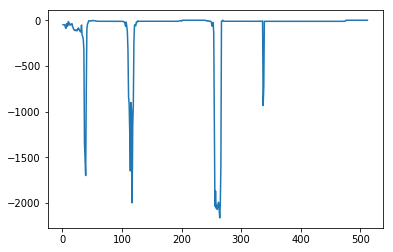

In [49]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['takeoff_episode'], results['takeoff_total_reward'])
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I chose to keep the same task, as changing it was optional

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: 

I used the DDPG algorithm, as this article inspired me: https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-i-q-learning-sarsa-dqn-ddpg-72a5e0cb6287

I set the discount factor to 0.95 and I introduced a factor for updating the params in a "softer" manner as instructed here https://arxiv.org/abs/1512.08562

I used a "plain" Neural network for both actor and critic. 8 layers for the critic and 8.
I used relu as an activation to focus on positive states and eliminate negativity and a unit number of 64 at all layers, along with dropout of 0.7 to eliminate overfitting

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

It learned over time(gradual curve), so it looks like a hard task to me. Also it took some time and it confused me the fact that I couldnt figure out when to stop the training. Any hint is appreciated :)

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part was getting started by far. After that, reading a couple of articles and revisiting the lectures made all the difference as I could revise selectively and apply appropriately. Settling to a decent set of hyperparams took a lot of trial and error too